<a href="https://colab.research.google.com/github/Sebastian-Wright/Prediccion-de-ventas-para-productos-alimenticios/blob/main/Proyecto1Parte4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

filename="sales_predictions.csv"
df = pd.read_csv(filename)
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


# 1) LIMPIEZA DE DATOS
Proceso en el cual se revisa el DF
-Campos categoricos mal escritos
-Duplicados
-Revision campos nulos
-Reemplazo de nulo (o eliminacion)
-Revision tipo de datos



In [145]:
df.info()
#Podemos ve que en la columna Item_weight tenemos muchos valores en null
#Al tener un codigo de producto UNICO, procedemos a ver la info separada por item_identifier para el caso de Item_weight. Ya que al ser un codigo único deberian repetirse sus caracteristicas en los demas items que tengan el mismo codigo.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [146]:
df3=df[["Item_Weight","Item_Identifier"]].groupby(["Item_Identifier"]).mean().astype(np.int64, errors='ignore').reset_index()
df3 
#A simple vista no entrega suficiente info, vamos a proceder a revisar los nulos para ver en que Item_Identifier se encuentran

,Item_Identifier,Item_Weight
0,DRA12,11.600
1,DRA24,19.350
2,DRA59,8.270
3,DRB01,7.390
4,DRB13,6.115
...,...,...
1554,NCZ30,6.590
1555,NCZ41,19.850
1556,NCZ42,10.500
1557,NCZ53,9.600


In [147]:
#Revisamos valores nulos dentro de la BBDD para el Item_Weight y sus Identificadores.
#Hay Productos 1142 que tienen valor Nulo, por lo tanto algunos de estos se repiten (ya que el total de nulos son 1559)
df_NullFilter = df['Item_Weight'].isnull()
df_NullFilter
df4 = df.loc[df_NullFilter,:]
df5=df4[["Item_Weight","Item_Identifier"]].groupby(["Item_Identifier"]).mean().astype(np.int64, errors='ignore').reset_index()
df5
df4


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362
...,...,...,...,...,...,...,...,...,...,...,...,...
8485,DRK37,NaN,Low Fat,0.043792,Soft Drinks,189.0530,OUT027,1985,Medium,Tier 3,Supermarket Type3,6261.8490
8487,DRG13,NaN,Low Fat,0.037006,Soft Drinks,164.7526,OUT027,1985,Medium,Tier 3,Supermarket Type3,4111.3150
8488,NCN14,NaN,Low Fat,0.091473,Others,184.6608,OUT027,1985,Medium,Tier 3,Supermarket Type3,2756.4120
8490,FDU44,NaN,Regular,0.102296,Fruits and Vegetables,162.3552,OUT019,1985,Small,Tier 1,Grocery Store,487.3656


In [148]:
#Generamos una tabla sin los valores Nulos para poder agrupar los pesos sin distorsionar su valor
df6 = df.loc[~df_NullFilter,:]
df6


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [149]:
#Sacamos el promedio de cada Item Weight sin contar con los valores nulos para que no distorsione el numero, y al ser todos los valores iguales para cada ITEM podemos asumir que el promedio de los pesos por ITEM no va variar.
#Generamos una tabla con los precios promedio de cada ITEM y asi vamos a poder llenar los espacios vacios en la tabla original.
df7=df6[["Item_Weight","Item_Identifier"]].groupby(["Item_Identifier"]).mean().reset_index()
df7

df_SINNULL = pd.merge(df, df7, on ="Item_Identifier", how='left')
df_SINNULL










,Item_Identifier,Item_Weight_x,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_y
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9.300
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,5.920
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,17.500
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,19.200
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,8.930
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,6.865
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850,8.380
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,10.600
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,7.210


In [150]:
#revisamos los datos que aun quedan en blanco y corroboramos que se puedan llenar con algun valor basado en otro campo
 
df_NullFilter2 = df_SINNULL['Item_Weight_y'].isnull()
df_NullFilter2
df8 = df_SINNULL.loc[df_NullFilter2,:]
df8
#Al no tener un valor asignado en ese peso, y siendo el Item Number el unico identificador unico del numero no podemos asumir el valor de otro campo como unico y reasignar el ItemWeight, por lo tanto se volvera hacer el join pero esta vez solo en un INNER-JOIN para dejar los Null fuera de la base de datos. 


,Item_Identifier,Item_Weight_x,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_y
927,FDN52,NaN,Regular,0.130933,Frozen Foods,86.9198,OUT027,1985,Medium,Tier 3,Supermarket Type3,1569.9564,NaN
1922,FDK57,NaN,Low Fat,0.079904,Snack Foods,120.0440,OUT027,1985,Medium,Tier 3,Supermarket Type3,4434.2280,NaN
4187,FDE52,NaN,Regular,0.029742,Dairy,88.9514,OUT027,1985,Medium,Tier 3,Supermarket Type3,3453.5046,NaN
5022,FDQ60,NaN,Regular,0.191501,Baking Goods,121.2098,OUT019,1985,Small,Tier 1,Grocery Store,120.5098,NaN


In [151]:
df_1 = pd.merge(df, df7, on ="Item_Identifier")
df_1

#Luego, revisamos las variables categoricas para ver que los valores que puedan tener esten bien asignados
df_Type1 = df_1['Item_Fat_Content'].unique()
df_Type1
#para este caso tenemos dos tipos de productos "Low Fat" y "Regular" pero hay 5 valores asignados, por lo que vamos a estandarizar a a los que corresponden 
df_2 = df_1.replace(["LF","low_fat","reg"],["Low_Fat","Low_Fat","Regular"])
df_2
#Revisamos ahora los valores del campo Item_Type
#df_Type2 = df_2['Item_Type'].unique()
#df_Type2
#no se ven datos mal escritos o mal catalogados

#Al revisar el Outlet_Size podemos ver que tiene valores nulos, pero haremos el mismo proceso con el Outlet_Identifier que hicimos con el Item_Identifier
#No puedo hacer groupby con un objeto por lo que le asignare un valor numerico para pasarlo a int
df_3 = df_2.replace(["Small","Medium","High"],["1","2","3"])
df_3['Outlet_Size'] = df_3['Outlet_Size'].astype('float')
df_3
df_NF = df_3['Outlet_Size'].isnull()
df_NF
df_NF_2 = df_3.loc[df_NF,:]
df_NF_2
df_NF_3 = df_3.loc[~df_NF,:]
df_NF_3

df_NF_4=df_NF_3[["Outlet_Identifier","Outlet_Size"]].groupby(["Outlet_Identifier"]).mean()
df_NF_4
df_SN= pd.merge(df_3, df_NF_4, on ="Outlet_Identifier",how='left')
df_SN


#Al hacer esta comprobacion podemos ver que los valores nulos para el Outlet Size no se pueden llenar en base al Outlet_Identifier. Al ser muchos valores nulos, no se sacaran de la base estas filas pero para analisis de locales no se tomaran en cuenta en su futuro.
#teniendo esto en cuenta se vuelve a usar la base sin reemplazar los valores de objeto a float (df_2).
df_2

,Item_Identifier,Item_Weight_x,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_y
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9.300
1,FDA15,9.300,Low Fat,0.016055,Dairy,250.2092,OUT045,2002,NaN,Tier 2,Supermarket Type1,5976.2208,9.300
2,FDA15,9.300,Low Fat,0.016019,Dairy,248.5092,OUT035,2004,Small,Tier 2,Supermarket Type1,6474.2392,9.300
3,FDA15,9.300,Low Fat,0.016088,Dairy,249.6092,OUT018,2009,Medium,Tier 3,Supermarket Type2,5976.2208,9.300
4,FDA15,9.300,Low Fat,0.026818,Dairy,248.9092,OUT010,1998,NaN,Tier 3,Grocery Store,498.0184,9.300
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8514,NCF55,6.675,Low_Fat,0.021666,Household,33.3874,OUT046,1997,Small,Tier 1,Supermarket Type1,1235.0590,6.675
8515,NCW30,5.210,Low Fat,0.011072,Household,257.8962,OUT017,2007,NaN,Tier 2,Supermarket Type1,4402.9354,5.210
8516,NCW30,5.210,Low Fat,0.011008,Household,259.5962,OUT035,2004,Small,Tier 2,Supermarket Type1,2848.9582,5.210
8517,NCW05,20.250,Low Fat,0.148303,Health and Hygiene,108.3938,OUT049,1999,Medium,Tier 1,Supermarket Type1,2787.0388,20.250


In [152]:
df_2.describe()
#al revisar los datos numericos podemos observar que no hay datos atipicos que salgan de un analisis, los años se ven dentro de un rango normal 
#para finalizar la limpieza y estandarizacion de la base de datos, vamos a eliminar la columna Item_weight_x proveniente del inner join, y le vamos a cambiar el nombre a la columna Item_weight_y por Item_Weight.
#df_2 = df_2.drop(['Item_Weight_x'],axis=1)
df_2


,Item_Identifier,Item_Weight_x,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_y
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9.300
1,FDA15,9.300,Low Fat,0.016055,Dairy,250.2092,OUT045,2002,NaN,Tier 2,Supermarket Type1,5976.2208,9.300
2,FDA15,9.300,Low Fat,0.016019,Dairy,248.5092,OUT035,2004,Small,Tier 2,Supermarket Type1,6474.2392,9.300
3,FDA15,9.300,Low Fat,0.016088,Dairy,249.6092,OUT018,2009,Medium,Tier 3,Supermarket Type2,5976.2208,9.300
4,FDA15,9.300,Low Fat,0.026818,Dairy,248.9092,OUT010,1998,NaN,Tier 3,Grocery Store,498.0184,9.300
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8514,NCF55,6.675,Low_Fat,0.021666,Household,33.3874,OUT046,1997,Small,Tier 1,Supermarket Type1,1235.0590,6.675
8515,NCW30,5.210,Low Fat,0.011072,Household,257.8962,OUT017,2007,NaN,Tier 2,Supermarket Type1,4402.9354,5.210
8516,NCW30,5.210,Low Fat,0.011008,Household,259.5962,OUT035,2004,Small,Tier 2,Supermarket Type1,2848.9582,5.210
8517,NCW05,20.250,Low Fat,0.148303,Health and Hygiene,108.3938,OUT049,1999,Medium,Tier 1,Supermarket Type1,2787.0388,20.250


In [153]:
#Finalmente quitamos los duplicados por si hay alguno, vemos tambien que no hay duplicados en la base
# El DF que se va seguir utilizando es df_3 para los graficos posteriores.
df_3 = df_2.drop_duplicates()
df_3

,Item_Identifier,Item_Weight_x,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_y
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9.300
1,FDA15,9.300,Low Fat,0.016055,Dairy,250.2092,OUT045,2002,NaN,Tier 2,Supermarket Type1,5976.2208,9.300
2,FDA15,9.300,Low Fat,0.016019,Dairy,248.5092,OUT035,2004,Small,Tier 2,Supermarket Type1,6474.2392,9.300
3,FDA15,9.300,Low Fat,0.016088,Dairy,249.6092,OUT018,2009,Medium,Tier 3,Supermarket Type2,5976.2208,9.300
4,FDA15,9.300,Low Fat,0.026818,Dairy,248.9092,OUT010,1998,NaN,Tier 3,Grocery Store,498.0184,9.300
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8514,NCF55,6.675,Low_Fat,0.021666,Household,33.3874,OUT046,1997,Small,Tier 1,Supermarket Type1,1235.0590,6.675
8515,NCW30,5.210,Low Fat,0.011072,Household,257.8962,OUT017,2007,NaN,Tier 2,Supermarket Type1,4402.9354,5.210
8516,NCW30,5.210,Low Fat,0.011008,Household,259.5962,OUT035,2004,Small,Tier 2,Supermarket Type1,2848.9582,5.210
8517,NCW05,20.250,Low Fat,0.148303,Health and Hygiene,108.3938,OUT049,1999,Medium,Tier 1,Supermarket Type1,2787.0388,20.250


In [154]:
#df_Type10 = df_3['Item_Fat_Content'].unique()
#df_Type10
df = df_3.replace(["Low_Fat","low fat"],["Low Fat","Low Fat"])

# 2) Análisis exploratorio de los datos
-Primeros graficos
-Matriz de correlación
-Entendimiento de los campos categoricos y como se relacionan con los campos numéricos.


In [155]:
# Vemos la correlacion entre varianbles 
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)
# Podemos ver que hay una buena correlacion entre las variables Item_Outlet_Sales y Item_MRP(Precio)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  This is separate from the ipykernel package so we can avoid doing imports until


,Item_Weight_x,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Weight_y
Item_Weight_x,1.00,-0.01,0.03,-0.01,0.01,1.00
Item_Visibility,-0.01,1.00,-0.00,-0.07,-0.13,-0.01
Item_MRP,0.03,-0.00,1.00,0.00,0.57,0.03
Outlet_Establishment_Year,-0.01,-0.07,0.00,1.00,-0.05,-0.01
Item_Outlet_Sales,0.01,-0.13,0.57,-0.05,1.00,0.01
Item_Weight_y,1.00,-0.01,0.03,-0.01,0.01,1.00


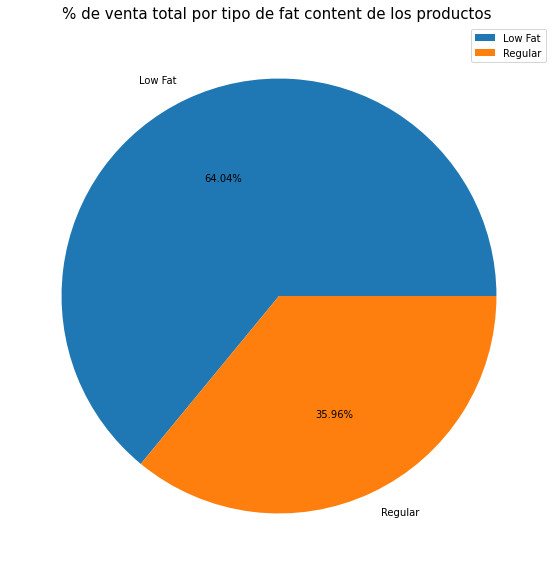

In [156]:
#Con este grafico se busca entender que tipo de fat content de productos se vende mas
dfg1 = df[['Item_Fat_Content','Item_Outlet_Sales']].groupby(['Item_Fat_Content',]).sum().reset_index()

dfg1.plot.pie(y ='Item_Outlet_Sales', labels = dfg1['Item_Fat_Content'],figsize=(10, 10), subplots=True,autopct='%1.2f%%')
plt.title('% de venta total por tipo de fat content de los productos ', size = 15)
plt.legend(bbox_to_anchor =(1,1))
plt.xlabel('')
plt.ylabel('')
plt.show()
#Podemos ver que la mayoria de las ventas se concentra en los productos Low Fat

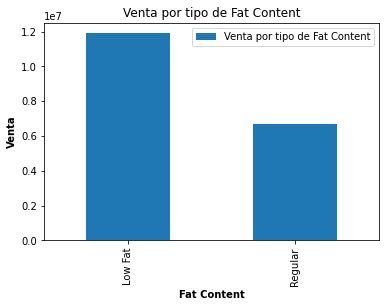

In [157]:
#Vemos la cantidad vendida por tipo de Fat Content
dfg2 = df[['Item_Fat_Content','Item_Outlet_Sales']].groupby(['Item_Fat_Content',]).sum().reset_index()

dfg2.plot.bar('Item_Fat_Content','Item_Outlet_Sales', label = "Venta por tipo de Fat Content")
plt.title('Venta por tipo de Fat Content')
plt.ylabel('Venta',fontweight="bold")
plt.xlabel('Fat Content',fontweight="bold")
plt.show()

# Al igual que en el primer grafico vemos que Low Fat vende mas que Regular, pero ahora se pretendia ver esa diferencia en valores absolutos

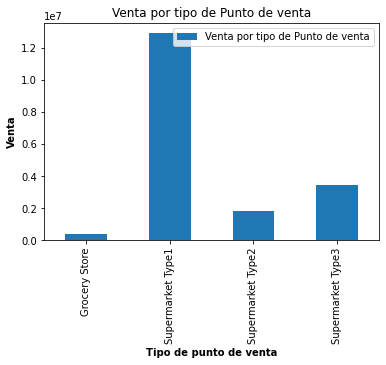

In [158]:
#Vemos la cantidad vendida por cada tipo de punto de venta

dfg3 = df[['Outlet_Type','Item_Outlet_Sales']].groupby(['Outlet_Type',]).sum().reset_index()

dfg3.plot.bar('Outlet_Type','Item_Outlet_Sales', label = "Venta por tipo de Punto de venta")
plt.title('Venta por tipo de Punto de venta')
plt.ylabel('Venta',fontweight="bold")
plt.xlabel('Tipo de punto de venta',fontweight="bold")
plt.show()
# Podemos ver que en valores absolutos de venta el tipo de negocio que vende mas este tipo de productos es el Supermarket Type1

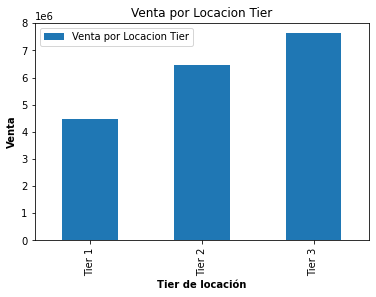

In [159]:
#Vemos la cantidad vendida por Tier
dfg4 = df[['Outlet_Location_Type','Item_Outlet_Sales']].groupby(['Outlet_Location_Type',]).sum().reset_index()

dfg4.plot.bar('Outlet_Location_Type','Item_Outlet_Sales', label = "Venta por Locacion Tier")
plt.title('Venta por Locacion Tier')
plt.ylabel('Venta',fontweight="bold")
plt.xlabel('Tier de locación',fontweight="bold")
plt.show()

#Podemos ver que en el Tier 3 es donde hay mas venta

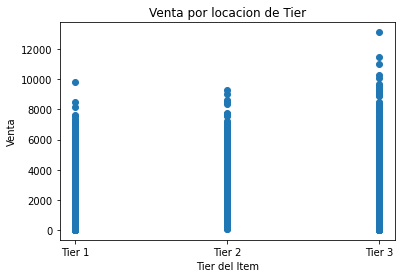

In [161]:
#Separamos en Regular y Low Fat el DF para ver el comportamiento en cada uno de los tipos de Fat content segun el tier
dfg11 = df.loc[df['Item_Fat_Content'] == 'Regular']
dfg12 = df.loc[df['Item_Fat_Content'] == 'Low Fat']
#dfg5_2

x = dfg12['Outlet_Location_Type']
y = dfg12['Item_Outlet_Sales']
#x = dfg11['Outlet_Location_Type']
#y = dfg11['Item_Outlet_Sales']

plt.scatter(x, y)

plt.xlabel("Tier del Item")
plt.ylabel("Venta")
plt.title('Venta por locacion de Tier')
plt.show()

#Creando un grafico por cada uno de los Fat Content se puede saca la misma conclusion, en el Tier 3 estan los valores pagados mas altos.

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


[]

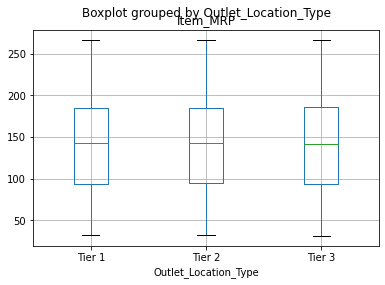

In [162]:
#Ahora vamos a ver si el precio del producto se condiciona con el tier, asumiento que los precios mas altos deben estar en el Tier 3.
boxplot = df.boxplot(column=['Item_MRP'], by = "Outlet_Location_Type")
boxplot.plot()
# En este caso podemos ver que en los 3 Tiers se mueven en los mismos rangos de precios y no hay mayor variacion entre ellos. Lo que debe estar variando son la cantidad vendida en cada Tier.

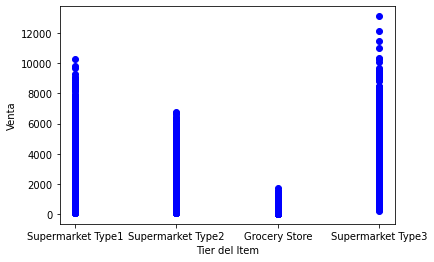

In [163]:
#Revisamos la dispersion de las ventas según el tipo de tienda al que pertenecen.
x = df['Outlet_Type']
y = df['Item_Outlet_Sales']

plt.scatter(x, y, c ="blue")
plt.xlabel("Tier del Item")
plt.ylabel("Venta")
plt.show()
#Podemos ver que el  Suprmarket Type 3 y Type 1 concentran las mayores ventas.
#Grocery Store tiene seguramente las ventas de productos mas de menor valor

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


[]

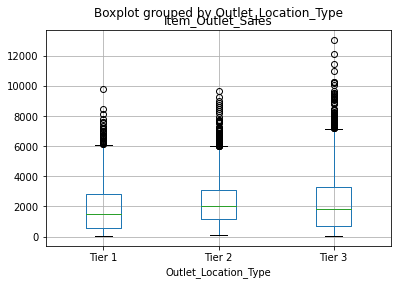

In [164]:
#Ventas por Tier 
boxplot = df.boxplot(column=['Item_Outlet_Sales'], by = "Outlet_Location_Type")
boxplot.plot()
#Podemos ver que en el Tier 3 a pesar de manejar los mismos rangos de precio del producto tiene ventas mas elevadas por lo tanto debe vender una mayor cantidad de los mismos.

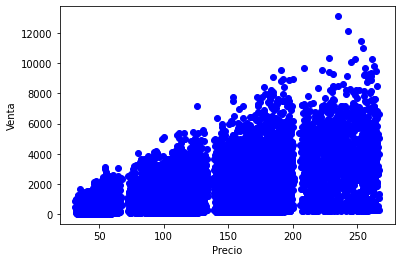

In [165]:
#Revisamos relacion que hay entre el monto de la venta y el precio del producto
x = df['Item_MRP']
y = df['Item_Outlet_Sales']

plt.scatter(x, y, c ="blue")
plt.xlabel("Precio")
plt.ylabel("Venta")
plt.show()
#Se puede ver que en los productos de mayor precio se ven reflejadas las mayores ventas.

In [140]:
#Ahora vamos a ver la cantidad de venta por tipo de Fat Content.
#Separamos el DF entre los tipos de Fat Content que tienen los productos.
#dfg = df[['Item_Fat_Content','Outlet_Location_Type', 'Item_Outlet_Sales']].groupby(['Item_Fat_Content', 'Outlet_Location_Type']).sum().reset_index()
#dfg5_1 = dfg.loc[dfg['Item_Fat_Content'] == 'Regular']
#dfg5_2 = dfg.loc[dfg['Item_Fat_Content'] == 'Low Fat']
#dfg5_2

#Cambiamos los nombres de columnas para cada uno de ellos 
#dfg5_1_2 = dfg5_1.rename(columns = {'Item_Fat_Content':'Regular'}).reset_index()

#dfg5_2_2 = dfg5_2.rename(columns = {'Item_Fat_Content':'Low Fat'}).reset_index()
#dfg5_1_2

#Agrupamos en un grafico de barras horizontales apiladas.

#plt.barh(dfg5_1_2['Outlet_Location_Type'],dfg5_1_2.index.values,label = 'Regular')
#plt.barh(dfg5_2_2['Outlet_Location_Type'],dfg5_2_2.index.values,label = 'Low Fat')


#plt.legend()
#plt.xlabel('Venta')
#plt.ylabel('Tier de locación')
#plt.title('Cantidad de venta en cada Tier de Locación segun el Fat Content')
#plt.show()

#Podemos ver que en Tier 1 no hay Venta asociada a Productos Low Fat, y que la mayoria de lo que se vende 
